## Classification Model for Oklahoma

In [1]:
# packages used
import pandas as pd
import numpy as np
from sklearn import tree
#from sklearn.ensemble import BaggingClassifier
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%run ./graph_counts.py

In [3]:
# Load the data
data_dir = 'Data/'
Stores = pd.read_csv(data_dir + 'AllStoresOklahoma.csv', dtype = str)
StoreType = pd.read_csv(data_dir + 'NonLowPointStoresOklahoma.csv', dtype = str)
Stores.head()

,RTL_STORE_CD,RTL_FIPS_COUNTY_DSC,RTL_PREMISE_TYPE_CD,RTL_CHANNEL_DSC,RTL_SUBCHANNEL_DSC,RTL_BEER_FLAG,RTL_LIQUOR_FLG
0,107452530,PONTOTOC,OFF,MASS MERCHANDISER,DOLLAR STORE,Y,N
1,200097024,OKLAHOMA,OFF,GROCERY,SUPERMARKET-CONVENTIONAL,Y,N
2,100135885,MUSKOGEE,OFF,CONVENIENCE STORE,CONVENTIONAL CONVENIENCE,Y,N
3,100950469,CANADIAN,OFF,CONVENIENCE STORE,CONVENTIONAL CONVENIENCE,Y,N
4,100560558,TULSA,OFF,MASS MERCHANDISER,DOLLAR STORE,Y,N


In [4]:
StoreType.head()

,RTL_STORE_CD,BEERTYPE
0,102523621,NonLowPoint
1,101992693,NonLowPoint
2,102008405,NonLowPoint
3,101992702,NonLowPoint
4,102228537,NonLowPoint


In [5]:
FullData = pd.merge(Stores, StoreType, on="RTL_STORE_CD", how="left")

In [6]:
FullData.loc[FullData['BEERTYPE'].isnull(),"BEERTYPE"] = "LowPoint"

In [7]:
FullData = pd.concat([FullData, pd.get_dummies(FullData['RTL_FIPS_COUNTY_DSC'],prefix='COUNTY')], axis=1)
FullData = pd.concat([FullData, pd.get_dummies(FullData['RTL_PREMISE_TYPE_CD'],prefix='PREMISE')], axis=1)
FullData = pd.concat([FullData, pd.get_dummies(FullData['RTL_CHANNEL_DSC'],prefix='CHANNEL')], axis=1)
FullData = pd.concat([FullData, pd.get_dummies(FullData['RTL_SUBCHANNEL_DSC'],prefix='SUBCHANNEL')], axis=1)
FullData = pd.concat([FullData, pd.get_dummies(FullData['RTL_BEER_FLAG'],prefix='BEER_LICENSE')], axis=1)
FullData = pd.concat([FullData, pd.get_dummies(FullData['RTL_LIQUOR_FLG'],prefix='LIQUOR_LICENSE')], axis=1)
FullData.head()

,RTL_STORE_CD,RTL_FIPS_COUNTY_DSC,RTL_PREMISE_TYPE_CD,RTL_CHANNEL_DSC,RTL_SUBCHANNEL_DSC,RTL_BEER_FLAG,RTL_LIQUOR_FLG,BEERTYPE,COUNTY_ADAIR,COUNTY_ALFALFA,...,SUBCHANNEL_THEATER,SUBCHANNEL_THEME PARK,SUBCHANNEL_UNKNOWN,SUBCHANNEL_WINERIES/VINEYARDS,BEER_LICENSE_N,BEER_LICENSE_U,BEER_LICENSE_Y,LIQUOR_LICENSE_N,LIQUOR_LICENSE_U,LIQUOR_LICENSE_Y
0,107452530,PONTOTOC,OFF,MASS MERCHANDISER,DOLLAR STORE,Y,N,LowPoint,0,0,...,0,0,0,0,0,0,1,1,0,0
1,200097024,OKLAHOMA,OFF,GROCERY,SUPERMARKET-CONVENTIONAL,Y,N,LowPoint,0,0,...,0,0,0,0,0,0,1,1,0,0
2,100135885,MUSKOGEE,OFF,CONVENIENCE STORE,CONVENTIONAL CONVENIENCE,Y,N,LowPoint,0,0,...,0,0,0,0,0,0,1,1,0,0
3,100950469,CANADIAN,OFF,CONVENIENCE STORE,CONVENTIONAL CONVENIENCE,Y,N,LowPoint,0,0,...,0,0,0,0,0,0,1,1,0,0
4,100560558,TULSA,OFF,MASS MERCHANDISER,DOLLAR STORE,Y,N,LowPoint,0,0,...,0,0,0,0,0,0,1,1,0,0


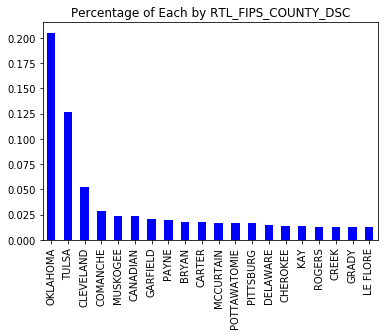

In [8]:
# Total Number of Stores by County
graph_counts(FullData, 'RTL_FIPS_COUNTY_DSC', False, 'bar', True, 20)

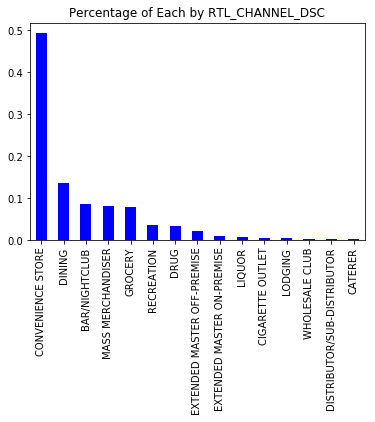

In [9]:
# Total Number Counts of Stores by Trade Channel
graph_counts(FullData, 'RTL_CHANNEL_DSC', False, 'bar', True, 15)

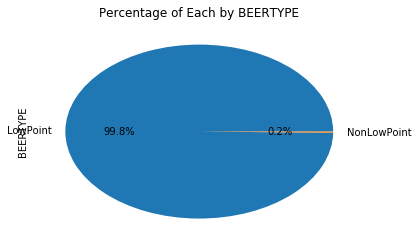

In [ ]:
# Total Number Counts of Stores by Type of Beer
graph_counts(FullData, 'BEERTYPE', False, 'pie', True, 15)

please input the subset Column
BEERTYPE
please input the subset Value
LowPoint


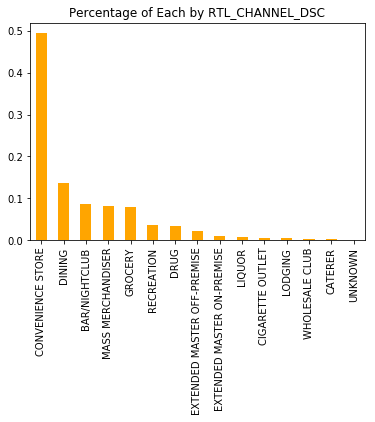

In [ ]:
#Count number of LowPoint stores by Channel
#subset Column: BEERTYPE 
#subset Value: LowPoint 
graph_counts(FullData,'RTL_CHANNEL_DSC', True , 'bar', True, 15)

please input the subset Column
BEERTYPE
please input the subset Value
NonLowPoint


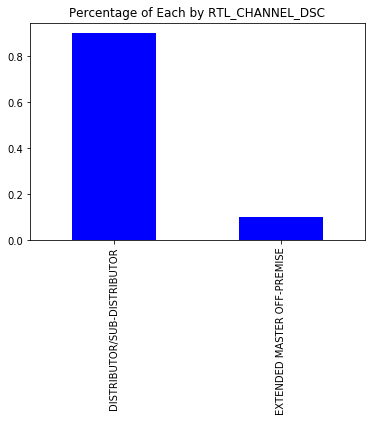

In [ ]:
#Count number of NonLowPoint stores by Channel
#subset Column: BEERTYPE 
#subset Value: NonLowPoint 
graph_counts(FullData,'RTL_CHANNEL_DSC', True , 'bar', True, 15)

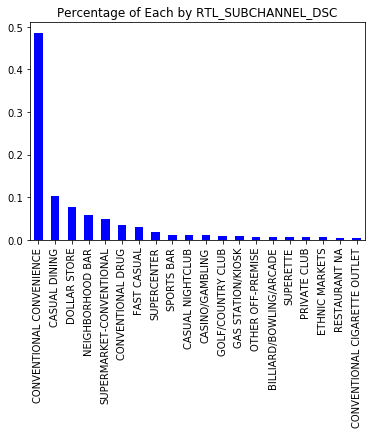

In [ ]:
#count by sub channel
graph_counts(FullData, 'RTL_SUBCHANNEL_DSC', False, 'bar', True, 20)

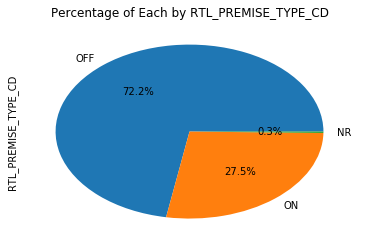

In [ ]:
#Percentage of Stores by Premise
graph_counts(FullData, 'RTL_PREMISE_TYPE_CD', False, 'pie', True, 'all')

please input the subset Column
RTL_PREMISE_TYPE_CD
please input the subset Value
ON


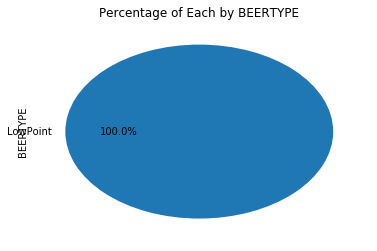

In [ ]:
# Percentage of Stores for On Premise
#subset column: RTL_PREMISE_TYPE_CD
#subset value: ON
graph_counts(FullData, 'BEERTYPE', True, 'pie', True, 'all')

please input the subset Column
RTL_PREMISE_TYPE_CD
please input the subset Value
OFF


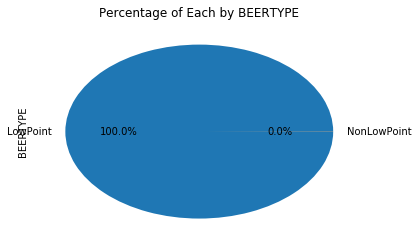

In [ ]:
# Percentage of Stores for Off Premise
#subset column: RTL_PREMISE_TYPE_CD
#subset value: OFF
graph_counts(FullData, 'BEERTYPE', True, 'pie', True, 'all')

## Business Rules

In [ ]:
FullData['PREDICTION'] = ""


In [ ]:
for row in range(len(FullData)):
    if FullData.loc[row,'RTL_CHANNEL_DSC'] == 'DISTRIBUTOR/SUB-DISTRIBUTOR' or FullData.loc[row,'RTL_CHANNEL_DSC'] == 'EXTENDED MASTER OFF-PREMISE':
            FullData.loc[row,'PREDICTION'] = 'NonLowPoint'
    else:
            FullData.loc[row,'PREDICTION'] = 'LowPoint'

# Business Rules result

In [ ]:
# Confusion Matrix
cm = confusion_matrix(FullData['BEERTYPE'], FullData['PREDICTION'])
cm

array([[4623,  101],
       [   0,   10]])

In [ ]:
#Accuracy
Accuracy = (cm[0,0] + cm[1,1])/ np.sum(cm)
Accuracy

0.97866497676383613

In [ ]:
#check how many stores are predicted wrong; which are they; what characters do they have
error_index_list = []
for index in range(len(FullData)):
    if FullData.ix[index , 'BEERTYPE'] != FullData.ix[index , 'PREDICTION']:
        error_index_list.append(index)
print('there are', len(error_index_list), 'errors in the prediction')

there are 101 errors in the prediction


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  after removing the cwd from sys.path.


In [ ]:
#check the error predictions
error_df = FullData.ix[error_index_list, ]
false_NonLowPoint = error_df.loc[error_df['BEERTYPE'] == 'LowPoint']
print('there are', len(false_NonLowPoint), 'false_NonLowPoint errors.')
false_NonLowPoint.head()

there are 101 false_NonLowPoint errors.


,RTL_STORE_CD,RTL_FIPS_COUNTY_DSC,RTL_PREMISE_TYPE_CD,RTL_CHANNEL_DSC,RTL_SUBCHANNEL_DSC,RTL_BEER_FLAG,RTL_LIQUOR_FLG,BEERTYPE,COUNTY_ADAIR,COUNTY_ALFALFA,...,SUBCHANNEL_THEME PARK,SUBCHANNEL_UNKNOWN,SUBCHANNEL_WINERIES/VINEYARDS,BEER_LICENSE_N,BEER_LICENSE_U,BEER_LICENSE_Y,LIQUOR_LICENSE_N,LIQUOR_LICENSE_U,LIQUOR_LICENSE_Y,PREDICTION
77,107526955,TULSA,OFF,EXTENDED MASTER OFF-PREMISE,ETHNIC MARKETS,N,N,LowPoint,0,0,...,0,0,0,1,0,0,1,0,0,NonLowPoint
100,107335479,OKLAHOMA,OFF,EXTENDED MASTER OFF-PREMISE,OTHER OFF-PREMISE,N,N,LowPoint,0,0,...,0,0,0,1,0,0,1,0,0,NonLowPoint
103,101976624,CHEROKEE,OFF,EXTENDED MASTER OFF-PREMISE,MARINA,N,N,LowPoint,0,0,...,0,0,0,1,0,0,1,0,0,NonLowPoint
120,103129889,OTTAWA,OFF,EXTENDED MASTER OFF-PREMISE,MARINA,N,N,LowPoint,0,0,...,0,0,0,1,0,0,1,0,0,NonLowPoint
151,100164484,CLEVELAND,OFF,EXTENDED MASTER OFF-PREMISE,ETHNIC MARKETS,N,N,LowPoint,0,0,...,0,0,0,1,0,0,1,0,0,NonLowPoint


In [ ]:
false_LowPoint = error_df.loc[error_df['BEERTYPE'] == 'NonLowPoint']
print('there are', len(false_LowPoint), 'false_LowPoint errors.')
false_LowPoint.head()

there are 0 false_LowPoint errors.


,RTL_STORE_CD,RTL_FIPS_COUNTY_DSC,RTL_PREMISE_TYPE_CD,RTL_CHANNEL_DSC,RTL_SUBCHANNEL_DSC,RTL_BEER_FLAG,RTL_LIQUOR_FLG,BEERTYPE,COUNTY_ADAIR,COUNTY_ALFALFA,...,SUBCHANNEL_THEME PARK,SUBCHANNEL_UNKNOWN,SUBCHANNEL_WINERIES/VINEYARDS,BEER_LICENSE_N,BEER_LICENSE_U,BEER_LICENSE_Y,LIQUOR_LICENSE_N,LIQUOR_LICENSE_U,LIQUOR_LICENSE_Y,PREDICTION


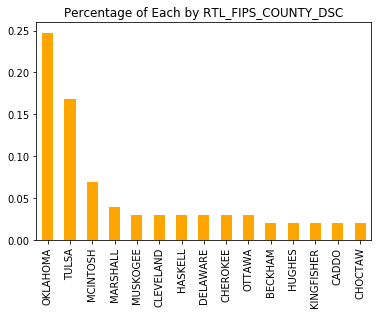

In [ ]:
#create false_NonLowPoint by County
graph_counts(false_NonLowPoint, 'RTL_FIPS_COUNTY_DSC', False, 'bar', True, 15)

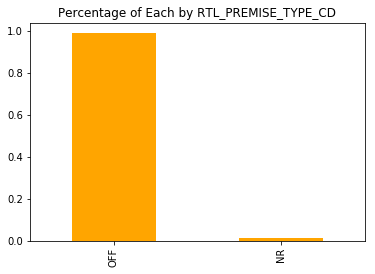

In [ ]:
#create false_NonLowPoint by premise type
graph_counts(false_NonLowPoint, 'RTL_PREMISE_TYPE_CD', False, 'bar', True, 15)

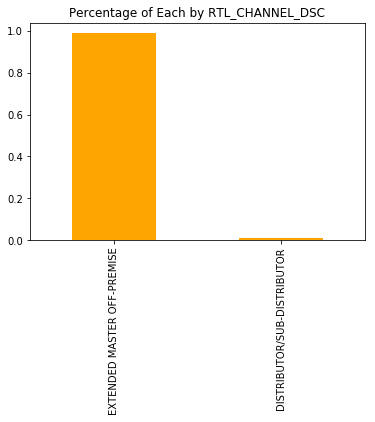

In [ ]:
#create false_NonLowPoint by Channel
graph_counts(false_NonLowPoint, 'RTL_CHANNEL_DSC', False, 'bar', True, 15)

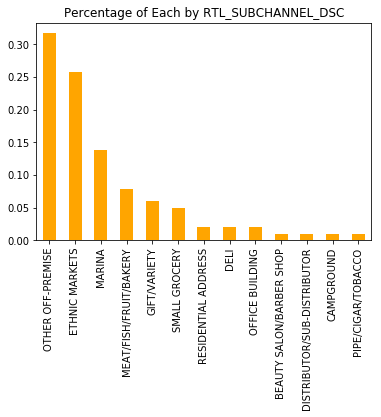

In [ ]:
#create false_NonLowPoint by sub channel
graph_counts(false_NonLowPoint, 'RTL_SUBCHANNEL_DSC', False, 'bar', True, 15)

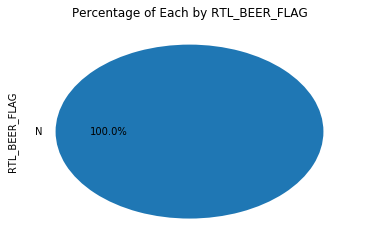

In [ ]:
#create false_NonLowPoint by Beer License
graph_counts(false_NonLowPoint, 'RTL_BEER_FLAG', False, 'pie', True, 15)

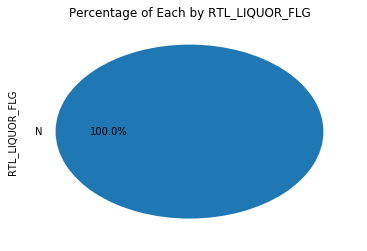

In [ ]:
#create false_NonLowPoint by Liquor License
graph_counts(false_NonLowPoint, 'RTL_LIQUOR_FLG', False, 'pie', True, 15)

### Decision Tree Approach

In [ ]:
# prepare data to fit model
X_labels = [c for c in FullData.columns if c not in ['RTL_STORE_CD','BEERTYPE','RTL_FIPS_COUNTY_DSC','RTL_PREMISE_TYPE_CD','RTL_CHANNEL_DSC','RTL_SUBCHANNEL_DSC','RTL_BEER_FLAG',"RTL_LIQUOR_FLG","PREDICTION"]]
X = FullData.loc[:,X_labels]
Y = FullData['BEERTYPE']

In [ ]:
parameters = {'max_depth':range(1,21), 'min_samples_leaf':range(3,21,3), 'min_samples_split':range(3,21,3), 'random_state': [0]}
clf = tree.DecisionTreeClassifier()
clf = GridSearchCV(clf, parameters, n_jobs = -2)
clf.fit(X, Y)
best_params = clf.best_params_
best_params

{'max_depth': 1,
 'min_samples_leaf': 3,
 'min_samples_split': 3,
 'random_state': 0}

# Decision Tree Result

In [ ]:
#the result: with the best tree depth and accuracy
best_depth = best_params['max_depth']
best_leaf = best_params['min_samples_leaf']
best_split = best_params['min_samples_split']
accuracy = clf.best_score_ 

print('the best depth is:', best_depth, 'with minimium leaf =',best_leaf , 'minimium split =',best_split, 'with accuracy:',round(accuracy*100, 3), '%')

the best depth is: 1 with minimium leaf = 3 minimium split = 3 with accuracy: 99.958 %


In [ ]:
#check the errors:

#create a new data frame to store the prediction result. 
result_df = FullData.loc[:, 'RTL_STORE_CD': 'BEERTYPE']
result_df['PRED_RESULT'] = clf.predict(X)
result_df.head()

,RTL_STORE_CD,RTL_FIPS_COUNTY_DSC,RTL_PREMISE_TYPE_CD,RTL_CHANNEL_DSC,RTL_SUBCHANNEL_DSC,RTL_BEER_FLAG,RTL_LIQUOR_FLG,BEERTYPE,PRED_RESULT
0,107452530,PONTOTOC,OFF,MASS MERCHANDISER,DOLLAR STORE,Y,N,LowPoint,LowPoint
1,200097024,OKLAHOMA,OFF,GROCERY,SUPERMARKET-CONVENTIONAL,Y,N,LowPoint,LowPoint
2,100135885,MUSKOGEE,OFF,CONVENIENCE STORE,CONVENTIONAL CONVENIENCE,Y,N,LowPoint,LowPoint
3,100950469,CANADIAN,OFF,CONVENIENCE STORE,CONVENTIONAL CONVENIENCE,Y,N,LowPoint,LowPoint
4,100560558,TULSA,OFF,MASS MERCHANDISER,DOLLAR STORE,Y,N,LowPoint,LowPoint


In [ ]:
#check how many stores are predicted wrong; which are they; what characters do they have
error_index_list = []
for index in range(len(result_df)):
    if result_df.ix[index , 'BEERTYPE'] != result_df.ix[index , 'PRED_RESULT']:
        error_index_list.append(index)
print('there are', len(error_index_list), 'errors in the prediction')

there are 2 errors in the prediction


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  after removing the cwd from sys.path.


In [ ]:
#check the error predictions
error_df = result_df.ix[error_index_list, ]
false_NonLowPoint = error_df.loc[error_df['BEERTYPE'] == 'LowPoint']
false_LowPoint = error_df.loc[error_df['BEERTYPE'] == 'NonLowPoint']
print('there are', len(false_NonLowPoint), 'false_NonLowPoint errors.')
print('there are', len(false_LowPoint), 'false_LowPoint errors.')
false_NonLowPoint.head()

there are 1 false_NonLowPoint errors.
there are 1 false_LowPoint errors.


,RTL_STORE_CD,RTL_FIPS_COUNTY_DSC,RTL_PREMISE_TYPE_CD,RTL_CHANNEL_DSC,RTL_SUBCHANNEL_DSC,RTL_BEER_FLAG,RTL_LIQUOR_FLG,BEERTYPE,PRED_RESULT
2709,101958071,COMANCHE,NR,DISTRIBUTOR/SUB-DISTRIBUTOR,DISTRIBUTOR/SUB-DISTRIBUTOR,N,N,LowPoint,NonLowPoint


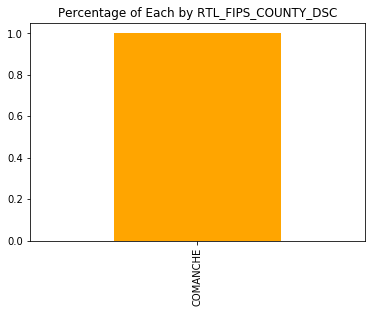

In [ ]:
#create false_NonLowPoint by County
graph_counts(false_NonLowPoint, 'RTL_FIPS_COUNTY_DSC', False, 'bar', True, 15)

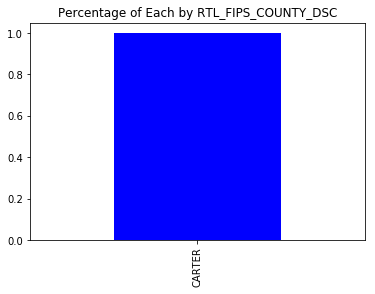

In [ ]:
#create false_LowPoint by County
graph_counts(false_LowPoint, 'RTL_FIPS_COUNTY_DSC', False, 'bar', True, 15)

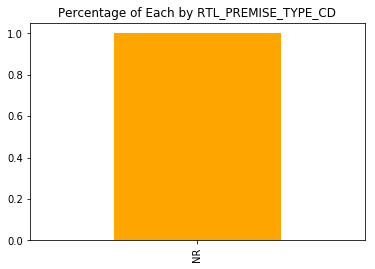

In [ ]:
#create false_NonLowPoint by premise type
graph_counts(false_NonLowPoint, 'RTL_PREMISE_TYPE_CD', False, 'bar', True, 15)

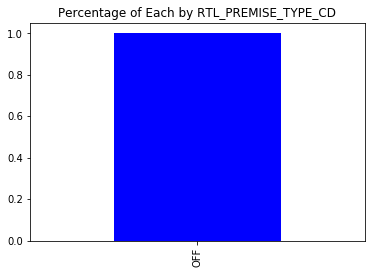

In [ ]:
#create false_LowPoint by premise type
graph_counts(false_LowPoint, 'RTL_PREMISE_TYPE_CD', False, 'bar', True, 15)

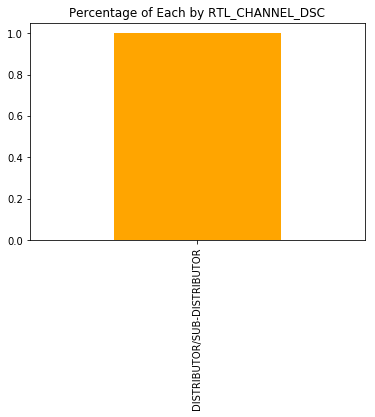

In [ ]:
#create false_NonLowPoint by Channel
graph_counts(false_NonLowPoint, 'RTL_CHANNEL_DSC', False, 'bar', True, 15)

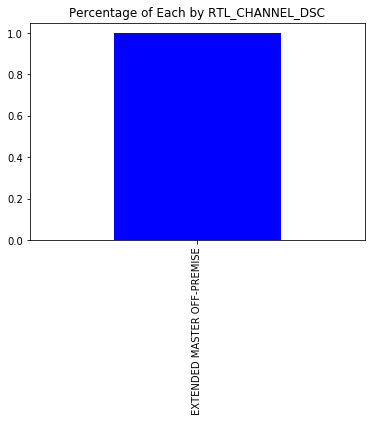

In [ ]:
#create false_LowPoint by Channel
graph_counts(false_LowPoint, 'RTL_CHANNEL_DSC', False, 'bar', True, 15)

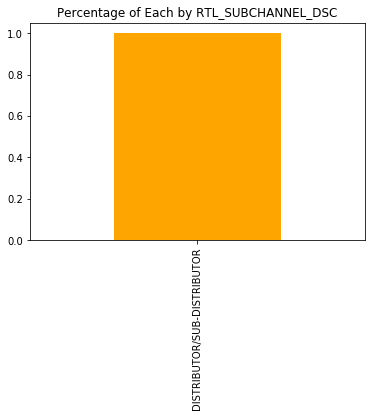

In [ ]:
#create false_NonLowPoint by sub channel
graph_counts(false_NonLowPoint, 'RTL_SUBCHANNEL_DSC', False, 'bar', True, 15)

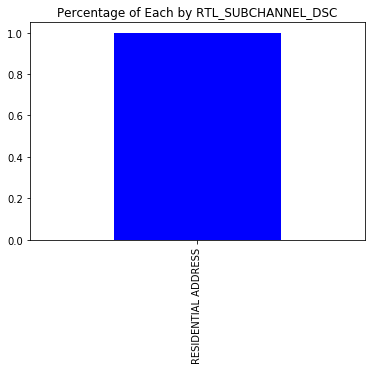

In [ ]:
#create false_LowPoint by sub channel
graph_counts(false_LowPoint, 'RTL_SUBCHANNEL_DSC', False, 'bar', True, 15)

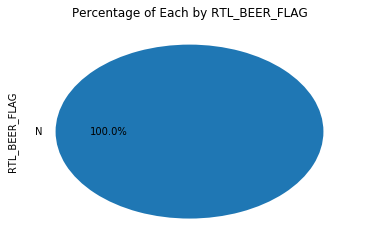

In [ ]:
#create false_NonLowPoint by Beer License
graph_counts(false_NonLowPoint, 'RTL_BEER_FLAG', False, 'pie', True, 15)

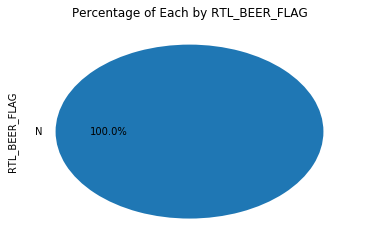

In [ ]:
#create false_LowPoint by Beer License
graph_counts(false_LowPoint, 'RTL_BEER_FLAG', False, 'pie', True, 15)

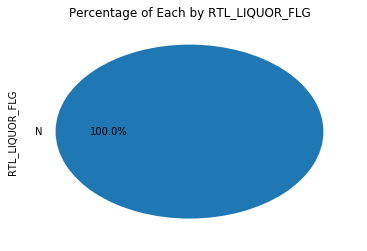

In [ ]:
#create false_NonLowPoint by Liquor License
graph_counts(false_NonLowPoint, 'RTL_LIQUOR_FLG', False, 'pie', True, 15)

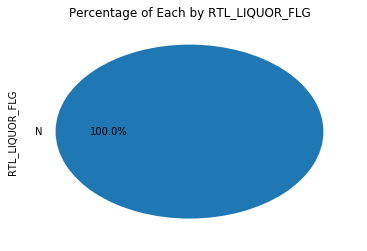

In [ ]:
#create false_LowPoint by Liquor License
graph_counts(false_LowPoint, 'RTL_LIQUOR_FLG', False, 'pie', True, 15)

In [ ]:
#feature importance
clf = tree.DecisionTreeClassifier(max_depth=best_depth, min_samples_leaf= best_leaf, min_samples_split = best_split, random_state=0)
clf = clf.fit(X,Y)

#all the features with their importance scores.
feature_score = pd.Series(data=clf.feature_importances_, index=X.columns).sort_values(ascending = False)

#only show the features that have scores greater than 0
feature_score[feature_score > 0]


SUBCHANNEL_DISTRIBUTOR/SUB-DISTRIBUTOR    1.0
dtype: float64

In [ ]:
# Confusion Matrix
cm = confusion_matrix(result_df['BEERTYPE'], result_df['PRED_RESULT'])
cm

array([[4723,    1],
       [   1,    9]])

In [ ]:
# True Positive Rate
TPR = cm[1,1]/(cm[1,1]+cm[1,0])
TPR

0.90000000000000002

In [ ]:
# False Negative Rate
FNR = cm[1,0]/(cm[1,0]+cm[1,1])
FNR

0.10000000000000001

In [ ]:
# True Negative Rate
TNR = cm[0,0]/(cm[0,0]+cm[0,1])
TNR

0.99978831498729892

In [ ]:
# False Positive Rate
FPR = cm[0,1]/(cm[0,1]+cm[0,0])
FPR

0.00021168501270110075